# Energieeffiziente IT

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)

Versionen der verwendeten python-Module: 
numpy 1.21.1
matplotlib 3.4.2
pandas 1.3.0
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/3.7.2/lib/python3.7/datetime.py'>
seaborn 0.11.1
plotly 5.1.0
sys 3.7.2 (default, Jul 22 2021, 09:40:35) 
[GCC 7.5.0]


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"
pd.set_option('display.latex.repr', True)
pd.set_option('display.latex.longtable', True)

### Funktionen definieren

## Lernziele für diese Einheit

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diese Einheit:</b></div>
    <ul>
        <li> IT-Systeme bezüglich Klimawirkung bei der Herstellung bewerten </li>
        <li> Nutzungsabhängigen CO<sub>2</sub> -Fußabdruck für Geräte und Infrastruktur (Server, Cloud, etc.) bewerten </li>
        <li> Einsparmöglichkeiten durch Reparatur und ressourcenarme Nutzung evaluieren </li>
    </ul>
</div>

## Verbrauchsdaten von IT Infrastruktur im Netz

Diese sind nicht so leicht zu finden, da diese Daten entweder für Firmen nicht relevant genug sind (da ihr Haupt-Energieverbrauch anderswo liegt und sie daher gar nicht wissen, was das Rechenzentrum verbraucht) oder sehr relevant sind (google hat wenig Interesse daran, dies zu veröffentlichen). 

Daher muss man etwas modellieren, entsprechend der Nutzung des betrachteten Gerätes. Wenn man z. B. einen Film übers Internet ansieht, dann fallen in der Infrastruktur des Internetanbieters Stromverbräuche an sowie in der Infrastruktur des Videoanbieters. Es gibt da verschiedene Ansätze, mit denen man anfangen kann:

<div class="admonition hint" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Hinweis:</b></div>
Wie man Normen findet: Wenn Sie mit cisco VPN bei der TH eingeloggt sind, können Sie auf <a href='https://www.perinorm.com'>Perinorm</a> nach Normen recherchieren und diese, sofern verfügbar, in der aktuellsten Version herunterladen. Außerdem können Sie bei der DKE (Deutsche Kommission für Elektrotechnische Normung) freundlich per Email anfragen und einzelne Normen für studentische Arbeiten erhalten.
</div>

```{admonition} Literaturquellen
- Eine Übersicht über den Verbrauch des Internets bietet [Aslan et.al. 2018](https://onlinelibrary.wiley.com/doi/abs/10.1111/jiec.12630) {cite:p}`aslan_electricity_2018`
- sehr ausführlich beschreiben [Dayarathna et al 2016](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7279063) {cite:p}`dayarathna_data_2016` Modellierungsansätze
- Effekte und Potenziale der PUE (power usage efficiency) beschreiben [Avgerinou et al 2017](https://www.mdpi.com/1996-1073/10/10/1470/pdf) {cite:p}`avgerinou_trends_2017`
- ein google-Datensatz (sic!) von 2011 und einer von 2019 findet sich bei [Dabbagh et al 2019](https://www.researchgate.net/profile/Mehiar_Dabbagh/post/Where_can_I_find_datasets_for_cloud_green_computing/attachment/59d63cb5c49f478072ea80d9/AS%3A273753479548928%401442279324931/download/Towards++Energy-Efficient+Cloud+COmputing.pdf) {cite:p}`dabbagh_towards_2015` mit Daten bei github https://github.com/google/cluster-data
- CENELEC bietet eine Übersicht über Normen für Datenzentren und da gibt es auch welche zu Energieaspekten [CENELEC 2020](https://www.cen.eu/work/Sectors/Digital_society/Pages/GreenDataCentres.aspx) {cite:p}`cenelec_green_2020`
- ein veralteter Datensatz eines Uni-Rechenzentrums in Houston findet sich bei [Kazandjieva et al 2012](http://sing.stanford.edu/pubs/igcc12.pdf) {cite:p}`kazandjieva_green_2012`
```

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Literaturquellen:</b></div>
    <ul>
        <li> Eine Übersicht über den Verbrauch des Internets bietet <a href='https://onlinelibrary.wiley.com/doi/abs/10.1111/jiec.12630'>Aslan et al. 2018</a> {cite:p}`aslan_electricity_2018` </li>
        <li> ehr ausführlich beschreiben <a href='https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7279063'>Dayarathaet et al. 2016</a> {cite:p}`dayarathna_data_2016` Modellierungsansätze </li>
        <li> Effekte und Potenziale der PUE (power usage efficiency) beschreiben <a href='https://www.mdpi.com/1996-1073/10/10/1470/pdf'>Avgenirou et. al.</a> {cite:p}`avgerinou_trends_2017` </li>
        <li> ein google-Datensatz (sic!) von 2011 und einer von 2019 findet sich bei <a href='https://www.researchgate.net/profile/Mehiar_Dabbagh/post/Where_can_I_find_datasets_for_cloud_green_computing/attachment/59d63cb5c49f478072ea80d9/AS%3A273753479548928%401442279324931/download/Towards++Energy-Efficient+Cloud+COmputing.pdf'>Dabbagh et al. 2019</a> {cite:p}`dabbagh_towards_2015` mit Daten bei <a href='https://github.com/google/cluster-data'>github</a> </li>
        <li> CENELEC bietet eine Übersicht über Normen für Datenzentren und da gibt es auch welche zu Energieaspekten <a href='https://www.cen.eu/work/Sectors/Digital_society/Pages/GreenDataCentres.aspx'>CENELEC 2020</a> {cite:p}`cenelec_green_2020` </li>
        <li> ein veralteter Datensatz eines Uni-Rechenzentrums in Houston findet sich bei <a href='http://sing.stanford.edu/pubs/igcc12.pdf'>Kazandjieva et al. 2012</a> {cite:p}`kazandjieva_green_2012` </li>
    </ul>
</div>

## Klimawirkung von python-Programmen

<div class="admonition warning" style="background: #fff9e5; padding: 10px">
<div class="title"><b>Warnung:</b></div>
Installation auf eigene Verantwortung.
Die python-Module hier sind nicht von mir geprüft, schon gar nicht für alle möglichen Betriebssystemversionen und python-Konfigurationen. Entscheiden Sie selbst, ob Ihnen die Installation auf Ihrem System sicher erscheint.
</div>

- [codecarbon.io](https://codecarbon.io/) - ein python-Modul, das die Klimawirkung der eigenen python-Programme ermitteln kann und dabei angeblich selber wenig zusätzliche Ressourcen ($\to$ Energie) verwendet

## Besser streamen oder herunterladen?

Der Betrieb des Internets fürs Video-Streaming beträgt ca. 230 kWh/TB {cite:p}`wolfgang_konen_co2-kosten_2020`.

In [3]:
W_Internet = 230 # kWh/TB
D_Internet = 1e12 # 1 TB Datenmenge (Terabyte)
D_Video = 3e9 # 3 GB für eine Stunde Full HD Video
W_Video = W_Internet*D_Video/D_Internet
print('Energieverbrauch im Internet '+str(W_Video)+' kWh für 1 Stunde Full HD')

Energieverbrauch im Internet 0.69 kWh für 1 Stunde Full HD


Hinzu kommt der Energieverbrauch des Endgeräts (Smartphone vs. Fernseher). Wenn man das Video mehr als einmal ansehen will, lohnt sich also energetisch herunterladen. Und für einen kleinen Bildschirm reicht auch meist eine kleine Datei (niedrigere Qualität), die dadurch auch mit weniger Aufwand verbunden ist.

## Besser Videokonferenz oder Präsenztreffen?

Natürlich gibt es viele Vorteile bei Präsenztreffen, die nur bedingt durch virtuelle Treffen wettgemacht werden können. Berechnet man, den CO$_2$-Aufwand, so erhält man {cite:p}`groger_green_2021`: Die CO$_2$-Emissionen bei der Teilnahme an einer einstündigen Videokonferenz mit dem Laptop sind vergleichbar mit 260 m Autofahrt.

## Energieverbrauch von IT

Hier streitet die Wissenschaft (und die Industrie):
- [The Shift Project](https://theshiftproject.org/en/home/)
- [c't](https://www.heise.de/ct/artikel/Streamen-ohne-Schuldgefuehle-Was-Nutzer-fuer-den-Klimaschutz-tun-koennen-4665976.html) {cite:p}`wolbert_streamen_2020`

````{margin}
<div class="admonition hint" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Anmerkung:</b></div>
Wie man c't Artikel findet: Wenn Sie im Netz der TH über den cisco VPN client surfen, können Sie auf wiso-net.de den entsprechenden Artikel herunterladen. Am besten lässt sich dieser über die Zeitschriftensuche dort eingrenzen.
</div>
````

Industrie-Lobby: 
- [ITIF](https://itif.org/sites/default/files/2020-energy-techlash.pdf) {cite:p}`cunliff_beyond_2020`

Wissenschaft: 
- [openHPI clean-IT: Towards Sustainable Digital Technologies MOOC](https://open.hpi.de/courses/cleanit2021)
- [enPower - Der Energiewende Podcast: #13 Streaming, CO2-Schleuder? - Dr. Clemens Rohde](https://www.enpower-podcast.de/podcast/13-streaming-co2-schleuder-dr-clemens-rohde) {cite:p}`julius_wesche_13_2020`
- [Digitaler CO2-Fußabdruck - Datensammlung vom Ökoinstitut](https://www.oeko.de/fileadmin/oekodoc/Digitaler-CO2-Fussabdruck.pdf) {cite:p}`groger_digitaler_2020`.

## Energieverbrauch von IT im Auto

Audiosysteme im Auto werden immer leistungshungriger {cite:p}`miroslaw_zielinski_optimierung_2021`

Für Vergleichbarkeit dient der Testzyklus "Automotive Audio Energy Efficiency Test Cycle" (AAEETC)

Nutzungsverhalten eines "durchschnittlichen" Nutzers: Entertainment, Telefon, Warnsounds, etc. definiert

Tankinhalt des meistverkauften Autos in den USA {cite:p}`miroslaw_zielinski_optimierung_2021`

In [4]:
EFord150 = 1327 # kWh

Tankinhalt eines Volkswagen Golf (Modelljahr 2021) {cite:p}`miroslaw_zielinski_optimierung_2021`

In [5]:
EGolf = 488 # kWh

Vergleichsweise große Fahrzeugbatterie eines vollelektrischen Autos {cite:p}`miroslaw_zielinski_optimierung_2021`

In [6]:
EBEV = 110 # kWh

$\to$ Der Energiebedarf für das Audiosystem fällt bei elektrischen Fahrzeugen stärker ins Gewicht.

Der AAEETC schlägt vor, die Nutzung von Musik, Warntöne, Stille-Phasen, Sprachassistent, Radio, Podcast und Telefon in bestimmter Weise zu vermessen (genauere Details in {cite:p}`miroslaw_zielinski_optimierung_2021`), um so den Energiebedarf verschiedener Audiosysteme vergleichen zu können.

Aus {cite:p}`miroslaw_zielinski_optimierung_2021` geht hervor, dass der Verbrauch durchschnittlich 18 kWh / 100 km für ein Elektrofahrzeug beträgt. 

Variiert man die durchschnittliche Leistung des Audiosystems, stellt man folgendes fest:

Text(0.5, 1.0, '% des mittleren Energieverbrauchs')

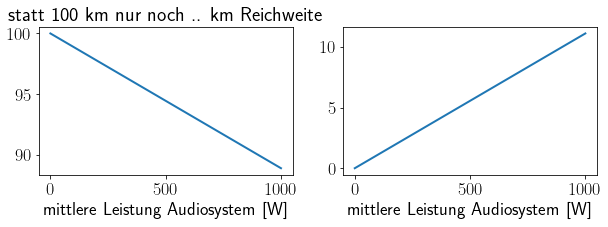

In [7]:
E100km = 18 # kWh
Paudio = np.linspace(0,1,10000) # in kW, mittlere Leistung
t100km = 2 # 2 Stunden durchschnittlich für 100 km (inkl. innerorts etc.)
Waudio = t100km*Paudio
saudio = 100*Waudio/E100km
plt.subplot(221)
plt.plot(1000*Paudio, 100-saudio)
plt.xlabel('mittlere Leistung Audiosystem [W]')
plt.title('statt 100 km nur noch .. km Reichweite')
plt.subplot(222)
plt.plot(1000*Paudio, saudio)
plt.xlabel('mittlere Leistung Audiosystem [W]')
plt.title('% des mittleren Energieverbrauchs');

```{bibliography}
:filter: docname in docnames
```